In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [4]:
all_matches = matches[(matches['team1'].isin(['Mumbai Indians', 'Delhi Capitals'])) & (matches['team2'].isin(['Mumbai Indians', 'Delhi Capitals']))]
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')
sub_data = data[(data['team1'].isin(['Mumbai Indians', 'Delhi Capitals'])) & (data['team2'].isin(['Mumbai Indians', 'Delhi Capitals']))]

### Who will win the match??

In [5]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,5/6/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,5/4/2008,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,5/24/2008,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,5/8/2009,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN


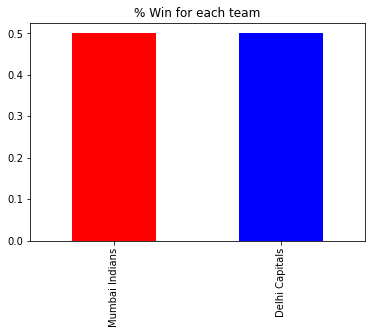

In [6]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color=['Red', 'Blue'])

In [7]:
qualifier_round = matches.groupby('season')['id'].unique().apply(lambda x : x[-1])

match_id = []
for i in qualifier_round:
    match_id.append(i)
    
sub_data1 = matches[matches['id'].isin(match_id)]

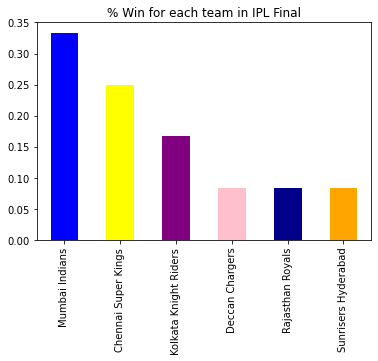

In [8]:
sub_data1['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team in IPL Final', color=['Blue', 'Yellow', 'Purple','Pink', 'DarkBlue', 'Orange'])

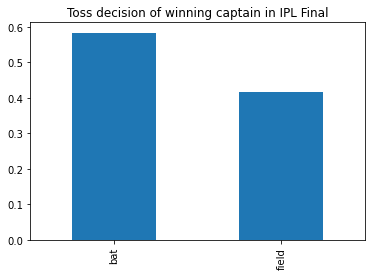

In [9]:
sub_data1['toss_decision'].value_counts(normalize=True).plot.bar(title='Toss decision of winning captain in IPL Final')

In [171]:
sub_data.groupby(['toss_winner', 'toss_decision'])['winner'].value_counts()

toss_winner     toss_decision  winner        
Delhi Capitals  bat            Mumbai Indians     462
                               Delhi Capitals     247
                field          Mumbai Indians    1661
                               Delhi Capitals     949
Mumbai Indians  bat            Mumbai Indians     742
                               Delhi Capitals     713
                field          Delhi Capitals    1001
Name: winner, dtype: int64

In [10]:
sub_data1.groupby(['toss_winner', 'toss_decision'])['winner'].value_counts()

toss_winner                  toss_decision  winner               
Chennai Super Kings          bat            Chennai Super Kings      2
                                            Kolkata Knight Riders    1
                             field          Chennai Super Kings      1
                                            Mumbai Indians           1
Kolkata Knight Riders        field          Kolkata Knight Riders    1
Mumbai Indians               bat            Mumbai Indians           3
Rajasthan Royals             field          Rajasthan Royals         1
Royal Challengers Bangalore  field          Deccan Chargers          1
Sunrisers Hyderabad          bat            Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [11]:
sub_data1.groupby(['winner'])['win_by_runs', 'win_by_wickets'].max()

,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,58,8
Deccan Chargers,6,0
Kolkata Knight Riders,0,5
Mumbai Indians,41,0
Rajasthan Royals,0,3
Sunrisers Hyderabad,8,0


In [12]:
sub_data1['player_of_match'].unique()

array(['KH Pandya', 'YK Pathan', 'A Kumble', 'SK Raina', 'M Vijay',
       'MS Bisla', 'KA Pollard', 'MK Pandey', 'RG Sharma', 'BCJ Cutting',
       'SR Watson', 'JJ Bumrah'], dtype=object)

In [13]:
match_id1 = sub_data1[(sub_data1['team1'].isin(['Mumbai Indians', 'Delhi Capitals'])) | (sub_data1['team2'].isin(['Mumbai Indians', 'Delhi Capitals']))]['id']

In [14]:
sub_data2 = data[data['match_id'].isin(match_id1)]

In [15]:
sub_data2.groupby(['match_id', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

match_id  batsman     
11415     SR Watson       84
576       LMP Simmons     68
457       MS Dhoni        63
          KA Pollard      60
234       SK Raina        57
576       DR Smith        57
59        SPD Smith       51
576       RG Sharma       50
234       SR Tendulkar    48
59        KH Pandya       47
Name: batsman_runs, dtype: int64

In [16]:
sub_data2.groupby(['match_id', 'bowler'])['player_dismissed'].count().sort_values(ascending=False).head(10)

match_id  bowler         
59        MG Johnson         4
457       DJ Bravo           4
11415     DL Chahar          3
576       MJ McClenaghan     3
234       SK Raina           2
11415     SL Malinga         2
457       MG Johnson         2
          JA Morkel          2
          Harbhajan Singh    2
          CH Morris          2
Name: player_dismissed, dtype: int64

### How many wickets will K Rabada will take??

In [19]:
sub_data3 = data[data['bowler']=='K Rabada']

In [18]:
sub_data4 = sub_data[sub_data['bowler']=='K Rabada']

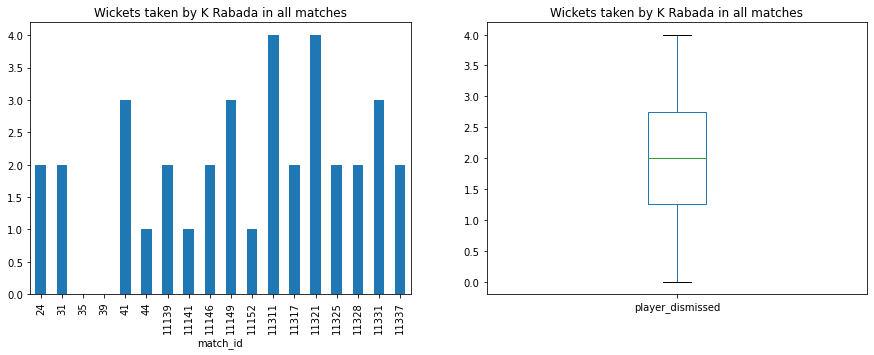

In [28]:
plt.subplot(1, 2, 1)
sub_data3.groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets taken by K Rabada in all matches', figsize=(15, 5))

plt.subplot(1, 2, 2)
sub_data3.groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets taken by K Rabada in all matches')


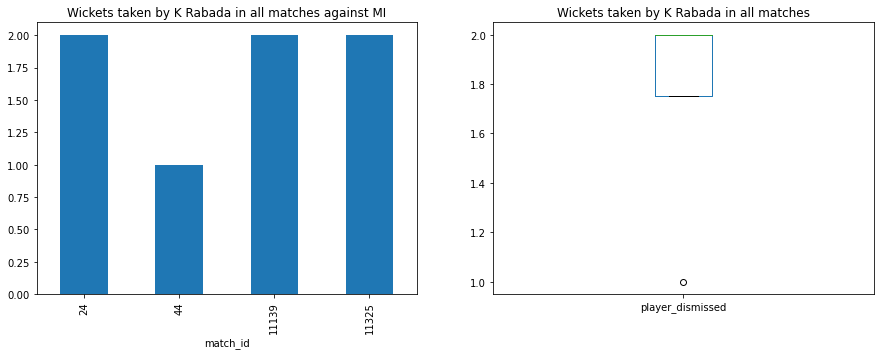

In [29]:
plt.subplot(1, 2, 1)
sub_data4.groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets taken by K Rabada in all matches against MI', figsize=(15, 5))

plt.subplot(1, 2, 2)
sub_data4.groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets taken by K Rabada in all matches')

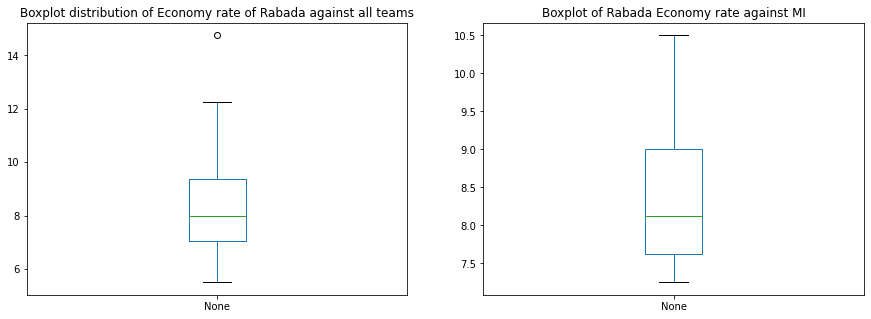

In [33]:
plt.subplot(1, 2, 1)
(sub_data3.groupby('match_id')['total_runs'].sum() / sub_data3.groupby('match_id')['over'].unique().apply(lambda x : len(x))).plot.box(title='Boxplot distribution of Economy rate of Rabada against all teams', figsize=(15, 5))

plt.subplot(1, 2, 2)
(sub_data4.groupby('match_id')['total_runs'].sum() / sub_data3.groupby('match_id')['over'].unique().apply(lambda x : len(x))).plot.box(title='Boxplot of Rabada Economy rate against MI')

In [37]:
round(sub_data3.groupby(['match_id', 'toss_decision'])['player_dismissed'].count().groupby('toss_decision').mean())

toss_decision
bat      2.0
field    2.0
Name: player_dismissed, dtype: float64

In [38]:
round(sub_data4.groupby(['match_id', 'toss_decision'])['player_dismissed'].count().groupby('toss_decision').mean())

toss_decision
bat      2.0
field    2.0
Name: player_dismissed, dtype: float64

In [47]:
sub_data3.groupby(['match_id'])['over'].unique()

match_id
24        [1, 4, 11, 19]
31        [2, 6, 15, 17]
35                [2, 4]
39        [2, 5, 18, 20]
41        [2, 5, 17, 19]
44        [2, 4, 16, 19]
11139     [5, 7, 17, 19]
11141     [4, 6, 16, 20]
11146     [1, 7, 17, 20]
11149     [1, 5, 18, 20]
11152     [6, 8, 17, 19]
11311     [6, 8, 18, 20]
11317     [4, 9, 16, 18]
11321     [2, 6, 17, 19]
11325    [2, 14, 16, 20]
11328    [5, 12, 18, 20]
11331     [2, 6, 18, 20]
11337     [4, 6, 18, 20]
Name: over, dtype: object

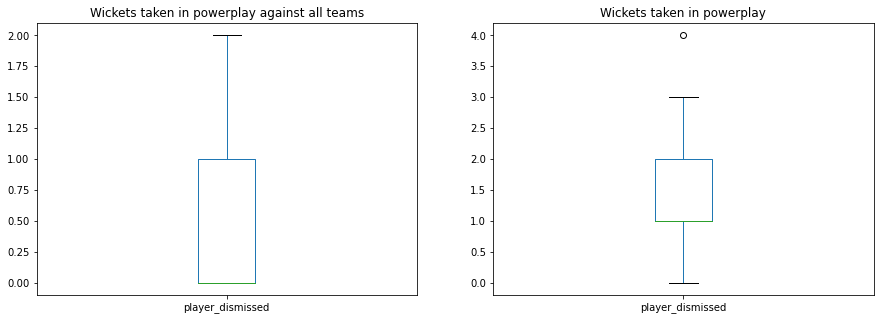

In [59]:
plt.subplot(1, 2 ,1)
sub_data3[sub_data3['over'].isin(range(1,7))].groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets taken in powerplay against all teams', figsize=(15,5))

plt.subplot(1, 2 ,2)
sub_data3[sub_data3['over'].isin(range(15,21))].groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets taken in powerplay')

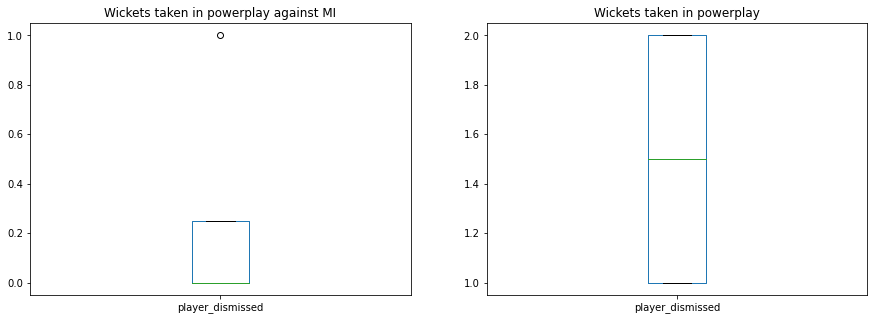

In [60]:
plt.subplot(1, 2 ,1)
sub_data4[sub_data4['over'].isin(range(1,7))].groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets taken in powerplay against MI', figsize=(15,5))

plt.subplot(1, 2 ,2)
sub_data4[sub_data3['over'].isin(range(15,21))].groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets taken in powerplay')

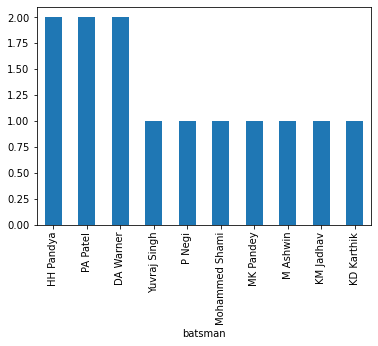

In [63]:
sub_data3.groupby(['batsman'])['player_dismissed'].count().sort_values(ascending=False).head(10).plot.bar()

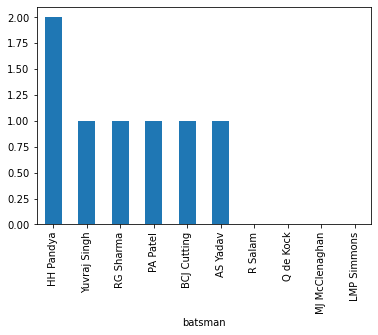

In [64]:
sub_data4.groupby(['batsman'])['player_dismissed'].count().sort_values(ascending=False).head(10).plot.bar()

(-1.25, 1.25, -1.25, 1.25)

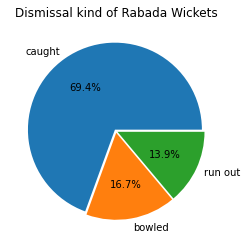

In [83]:
sub_data3['dismissal_kind'].value_counts().plot.pie(title='Dismissal kind of Rabada Wickets', autopct = '%1.1f%%', explode = (0.02, 0.02, 0.02))
plt.axis("off")

In [84]:
sub_data4.groupby(['dismissal_kind', 'batsman'])['player_dismissed'].count()

dismissal_kind  batsman     
bowled          PA Patel        1
caught          AS Yadav        1
                BCJ Cutting     1
                HH Pandya       1
                RG Sharma       1
                Yuvraj Singh    1
run out         HH Pandya       1
Name: player_dismissed, dtype: int64

### How many runs will be scored by H Pandya in the match??

In [86]:
sub_data5 = sub_data[sub_data['batsman']=='HH Pandya']

In [122]:
batting_pos = []
for i in sub_data[sub_data['batting_team']=='Mumbai Indians'].groupby('match_id')['player_dismissed'].unique().tolist():
    count = 0
    for j in i:
        if j == 'HH Pandya':
            batting_pos.append(count)
            break
        else:
            count += 1

In [123]:
batting_pos

[8, 6, 2, 7, 7, 5, 5]

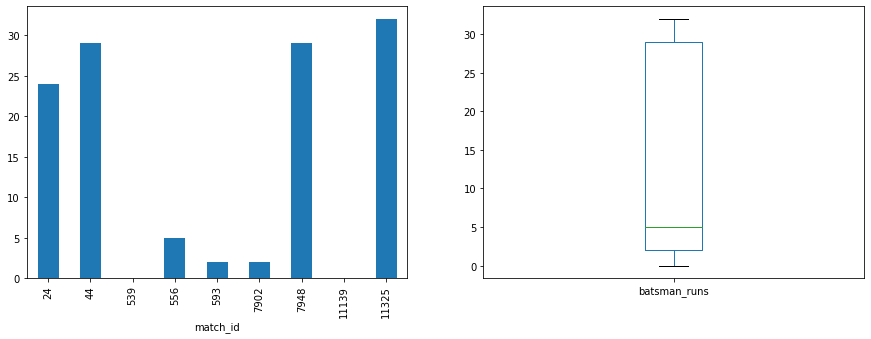

In [126]:
plt.subplot(1, 2, 1)
sub_data5.groupby('match_id')['batsman_runs'].sum().plot.bar(figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data5.groupby('match_id')['batsman_runs'].sum().plot.box()

In [129]:
sub_data5.groupby(['match_id', 'bowler'])['batsman_runs'].sum()

match_id  bowler         
24        A Mishra            2
          CH Morris          10
          K Rabada            7
          PJ Cummins          4
          Z Khan              1
44        CJ Anderson         8
          K Rabada            4
          PJ Cummins         17
539       Imran Tahir         0
556       NM Coulter-Nile     0
          Z Khan              5
593       CH Morris           2
7902      Mohammed Shami      1
          TA Boult            1
7948      A Mishra            4
          HV Patel            2
          S Lamichhane       13
          TA Boult           10
11139     AR Patel            0
11325     CH Morris          13
          K Paul             12
          K Rabada            7
Name: batsman_runs, dtype: int64

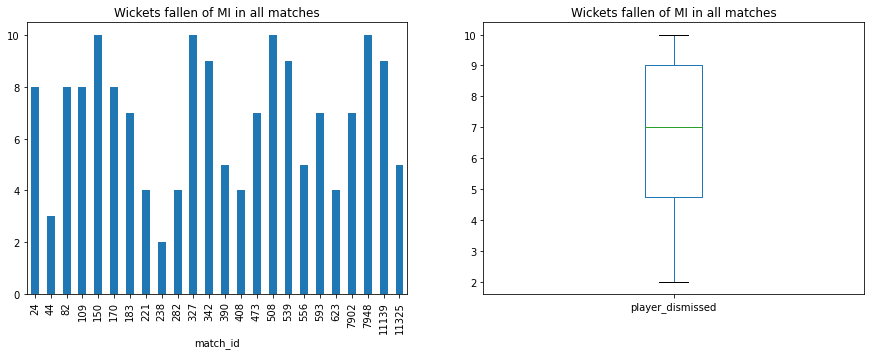

In [136]:
plt.subplot(1, 2, 1)
sub_data[sub_data['batting_team']=='Mumbai Indians'].groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets fallen of MI in all matches', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data[sub_data['batting_team']=='Mumbai Indians'].groupby('match_id')['player_dismissed'].count().plot.box(title='Wickets fallen of MI in all matches')

### How many no-balls will be bowled in the match??

In [138]:
sub_data6 = sub_data[sub_data['noball_runs']!=0]

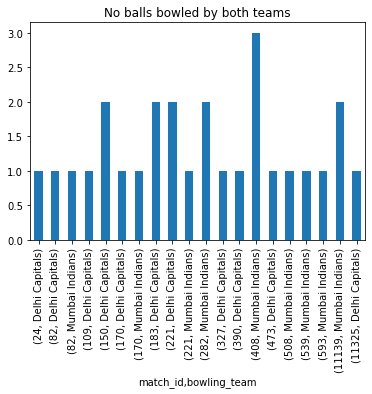

In [144]:
sub_data6.groupby(['match_id', 'bowling_team'])['ball'].count().plot.bar(title='No balls bowled by both teams')

In [146]:
round(sub_data6.groupby(['match_id', 'bowling_team'])['ball'].count().groupby('bowling_team').mean())

bowling_team
Delhi Capitals    1.0
Mumbai Indians    1.0
Name: ball, dtype: float64

In [149]:
sub_data6.groupby(['match_id', 'bowler'])['ball'].count().groupby('bowler').mean()

bowler
A Mishra        1.000000
A Nehra         1.000000
CRD Fernando    1.000000
DP Nannes       1.000000
DR Smith        1.000000
DS Kulkarni     1.000000
GD McGrath      1.000000
JJ Bumrah       1.500000
K Paul          1.000000
K Rabada        1.000000
M Morkel        1.000000
M de Lange      1.000000
MF Maharoof     1.000000
PJ Sangwan      1.500000
R Salam         2.000000
SL Malinga      1.333333
UT Yadav        1.000000
WD Parnell      1.000000
Name: ball, dtype: float64

### How many runs will be scored in total by both teams??

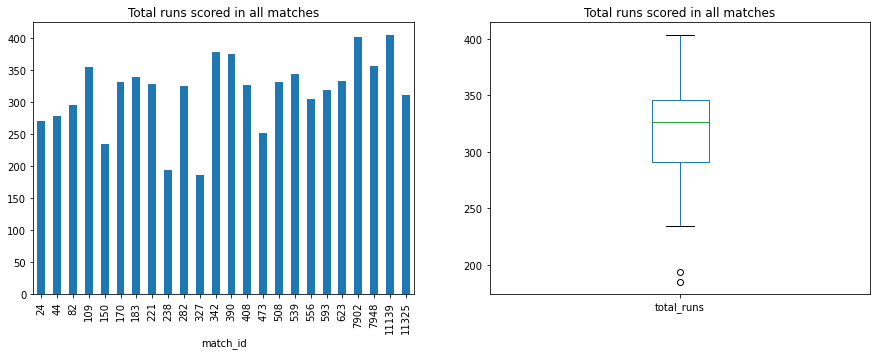

In [154]:
plt.subplot(1, 2, 1)
sub_data.groupby('match_id')['total_runs'].sum().plot.bar(title='Total runs scored in all matches', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data.groupby('match_id')['total_runs'].sum().plot.box(title='Total runs scored in all matches')

In [157]:
round(sub_data.groupby(['match_id', 'batting_team'])['total_runs'].sum().groupby('batting_team').mean())

batting_team
Delhi Capitals    149.0
Mumbai Indians    166.0
Name: total_runs, dtype: float64

In [166]:
round(sub_data[(sub_data['toss_decision']=='bat') & (sub_data['batting_team']==sub_data['toss_winner'])].groupby(['match_id', 'batting_team'])['total_runs'].sum().groupby('batting_team').mean())

batting_team
Delhi Capitals    144.0
Mumbai Indians    161.0
Name: total_runs, dtype: float64

It is clear from the above analysis that the average score of MI is more as compared to DC.